# Basic classification

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


### Load data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_images.shape)
print(train_labels)

(60000, 28, 28)
[9 0 0 ... 3 0 5]


In [3]:
# Normalize
train_images = train_images / 255.0
test_images = test_images / 255.0

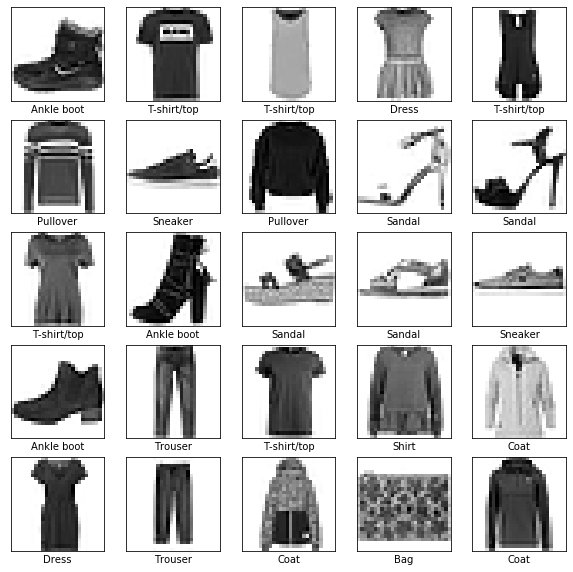

In [4]:
# Show data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.fit(train_images, train_labels, epochs=10, verbose=2)

Epoch 1/10
60000/60000 - 4s - loss: 0.4983 - acc: 0.8241
Epoch 2/10
60000/60000 - 3s - loss: 0.3746 - acc: 0.8653
Epoch 3/10
60000/60000 - 3s - loss: 0.3359 - acc: 0.8766
Epoch 4/10
60000/60000 - 3s - loss: 0.3103 - acc: 0.8839
Epoch 5/10
60000/60000 - 3s - loss: 0.2967 - acc: 0.8907
Epoch 6/10
60000/60000 - 3s - loss: 0.2782 - acc: 0.8974
Epoch 7/10
60000/60000 - 3s - loss: 0.2674 - acc: 0.9000
Epoch 8/10
60000/60000 - 3s - loss: 0.2569 - acc: 0.9040
Epoch 9/10
60000/60000 - 3s - loss: 0.2477 - acc: 0.9077
Epoch 10/10
60000/60000 - 3s - loss: 0.2361 - acc: 0.9112


### Evaluate accuracy

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.3650 - acc: 0.8727
Test accuracy: 0.8727


### Make predictions

In [8]:
predictions = model.predict(test_images)
print(np.argmax(predictions[0]))
print(test_labels[0])

9
9


In [9]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)
  
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

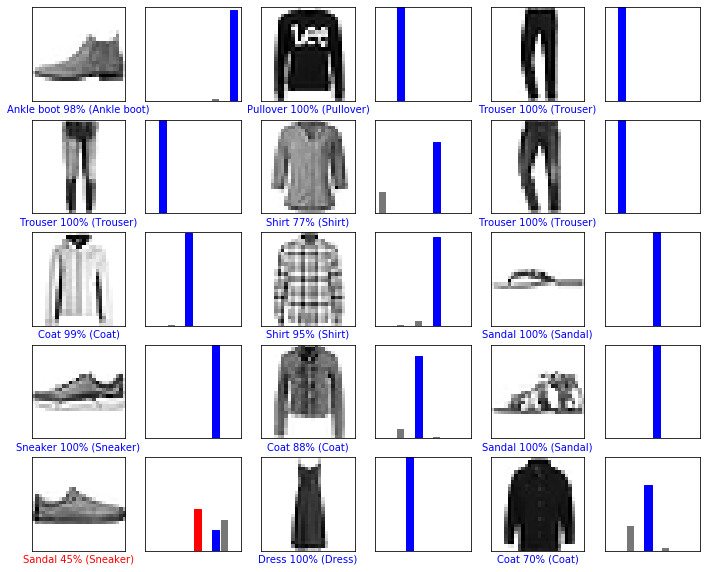

In [10]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.show()